#### Team members

1. Mostafa Allahmoradi - 9087818
2. Cemil Caglar Yapici – 9081058
3. Jarius Bedward - 8841640

### Import all necessary libraries

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


#### Problem statement

Area of Focus:  
In today’s world, health conditions such as heart disease, obesity, and diabetes are rapidly increasing. Many of these illnesses are directly linked to preventable lifestyle factors such as poor diet, lack of physical activity, smoking, alcohol consumption, and inadequate sleep. Despite increased awareness about healthy living, many individuals are still at risk because they underestimate how daily habits affect their well-being in long-term. 

Outcome:  
Early detection and prevention could save lives and reduce medical costs, but traditional screening methods are often not effective, and they typically only identify problems after symptoms appear, missing critical opportunities for prevention. 

This project aims to explore how machine learning can help predict the likelihood of developing a heart condition (or general illness) based on an individual’s diet, lifestyle, and fitness-related factors. By analyzing real-world health data, our goal is to identify key risk factors and build a predictive model that can help individuals take proactive measures toward healthier living.

#### Hypothesis

Null hypothesis: 

H0: Individual with composite lifestyle score (worse diet + smoking + high alcohol consumption + low activity + poor sleep) are at high risk of heart disease 

 
Alternative hypothesis: 

H1: Current smokers have higher odds of heart disease than non-smokers 
Test: logistic regression coefficient for smoking; report odds ratio (O.R.) and 95% CI. 
 
H2: Individuals with low physical activity (e.g., <150 min/week) have a higher chance of heart disease than those meeting activity guidelines. 
Test: logistic regression or compare group prevalences; p-value for activity variable. 

H3: Higher BMI is positively associated with heart disease risk (dose–response). 
Test: regression coefficient per unit BMI and/or BMI category comparisons. 

H4: A model using lifestyle and fitness variables (diet quality, physical activity, smoking, alcohol use, sleep, BMI) will predict the likelihood of heart disease occuring 
Test: compare model performance (ROC-AUC, F1) for (a) single best predictor vs (b) composite score vs (c) full model. 

#### Data Sources: 

Health and Lifestyle Data for Regression 

Heart Attack Prediction

#### Explains if and how Clustering applies to your term project with a 50-word summary

Clustering can segment individuals into groups based on shared health attributes such as blood pressure, cholesterol, and lifestyle factors. By identifying natural clusters, we can discover hidden risk patterns, target prevention programs, and personalize health recommendations without prior labels—enhancing early detection and understanding of heart attack risk profiles.

#### 1. Load data sources & Understanding the data

In [241]:
# Load the dataset
health_condition_dataset = pd.read_csv('data/heart_attack_prediction_dataset.csv')
original_df = health_condition_dataset.copy()

# View basic structure
print("=== Dataset Overview ===")
print(f"Shape: {health_condition_dataset.shape[0]} rows, {health_condition_dataset.shape[1]} columns")
print("\nColumn Names:\n", health_condition_dataset.columns.tolist())

# Display first few rows
print("\n=== Sample Data (First 5 Rows) ===")
display(health_condition_dataset.head(5))

#  data types and non-null counts
print("\n=== Data Info ===")
print(health_condition_dataset.info())

# Summary statistics for numeric columns
print("\n=== Statistical Summary (Numeric Columns) ===")
print(health_condition_dataset.describe().T)

# Check categorical column value counts (optional preview)
print("\n=== Example Value Counts (First 5 Categorical Columns) ===")
for col in health_condition_dataset.select_dtypes(include='object').columns[:5]:
    print(f"\n{col}:\n", health_condition_dataset[col].value_counts().head())

# Identify missing values
print("\n=== Missing Values Per Column ===")
print(health_condition_dataset.isnull().sum())

=== Dataset Overview ===
Shape: 158355 rows, 28 columns

Column Names:
 ['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']

=== Sample Data (First 5 Rows) ===


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1



=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 1

2. DATA CLEANING 

In [242]:

# Remove duplicate records
health_condition_dataset = health_condition_dataset.drop_duplicates()
print("After removing duplicates:", health_condition_dataset.shape)

# Handle missing values
# Fill numeric columns with median, categorical columns with mode
for col in health_condition_dataset.columns:
    if health_condition_dataset[col].dtype in ['int64', 'float64']:
        health_condition_dataset[col].fillna(health_condition_dataset[col].median(), inplace=True)
    else:
        health_condition_dataset[col].fillna(health_condition_dataset[col].mode()[0], inplace=True)

# Clean up categorical text (remove extra spaces, capitalize)
for col in health_condition_dataset.select_dtypes(include='object').columns:
    health_condition_dataset[col] = health_condition_dataset[col].astype(str).str.strip().str.title()

# Convert simple binary categories to numeric (0 and 1)
binary_map = {
    "Yes": 1, "No": 0,
    "Male": 1, "Female": 0,
    "True": 1, "False": 0
}
health_condition_dataset.replace(binary_map, inplace=True)

# Handle outliers by capping to 1st and 99th percentile (for numeric columns)
numeric_cols = health_condition_dataset.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    lower, upper = health_condition_dataset[col].quantile([0.01, 0.99])
    health_condition_dataset[col] = health_condition_dataset[col].clip(lower, upper)

# Check results
print("\nCleaned dataset preview:")
print(health_condition_dataset.head())

print("\nMissing values after cleaning:")
print(health_condition_dataset.isnull().sum().sum(), "missing values remaining")

print("\nDataset shape after cleaning:", health_condition_dataset.shape)

After removing duplicates: (158355, 28)


C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_49064\168174121.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_condition_dataset[col].fillna(health_condition_dataset[col].median(), inplace=True)
C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_49064\168174121.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett


Cleaned dataset preview:
   age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60       1  Rural       Middle             0         1                211   
1   53       0  Urban          Low             0         0                208   
2   62       0  Urban          Low             0         0                231   
3   73       1  Urban          Low             1         0                202   
4   52       1  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   



3. FEATURE SELECTION

In [243]:
# Select key health-related numeric indicators
features = [
    'age',
    'cholesterol_level',
    'blood_pressure_systolic',
    'blood_pressure_diastolic',
    'fasting_blood_sugar',
    'cholesterol_hdl',
    'cholesterol_ldl',
    'triglycerides'
]

# Keep only selected columns (ignore target or categorical features)
X = health_condition_dataset[features].copy()

print("\nSelected features for clustering:")
print(X.columns.tolist())

# Check for remaining missing or invalid values
print("\nMissing values in selected features:")
print(X.isnull().sum())

# Basic statistics summary
print("\nStatistical summary of selected features:")
print(X.describe().T)




Selected features for clustering:
['age', 'cholesterol_level', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']

Missing values in selected features:
age                         0
cholesterol_level           0
blood_pressure_systolic     0
blood_pressure_diastolic    0
fasting_blood_sugar         0
cholesterol_hdl             0
cholesterol_ldl             0
triglycerides               0
dtype: int64

Statistical summary of selected features:
                             count        mean        std    min    25%  \
age                       158355.0   54.522364  11.769555   27.0   46.0   
cholesterol_level         158355.0  199.457706  39.243721  107.0  172.0   
blood_pressure_systolic   158355.0  129.516851  14.709825   95.0  119.0   
blood_pressure_diastolic  158355.0   79.492937   9.835200   56.0   73.0   
fasting_blood_sugar       158355.0  110.630040  27.373330   70.0   89.0   
cholesterol_hdl    

4. DATA STANDARDIZATION (DATA SCALING)

In [244]:

print("Before scaling:")
print(X.describe().T[['mean', 'std']])

# Initialize StandardScaler (Z-score normalization)
scaler = StandardScaler()

# Fit and transform the numeric data
X_scaled = scaler.fit_transform(X)

# Convert scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled_range = scaler.fit_transform(X_scaled_df)

# Verify results
print("\nAfter scaling:")
print(X_scaled_df.describe().T[['mean', 'std']])



Before scaling:
                                mean        std
age                        54.522364  11.769555
cholesterol_level         199.457706  39.243721
blood_pressure_systolic   129.516851  14.709825
blood_pressure_diastolic   79.492937   9.835200
fasting_blood_sugar       110.630040  27.373330
cholesterol_hdl            49.494149   9.818243
cholesterol_ldl           129.578087  34.265179
triglycerides             149.551767  48.580741

After scaling:
                                  mean       std
age                       1.103808e-17  1.000003
cholesterol_level        -1.379760e-16  1.000003
blood_pressure_systolic   4.812334e-16  1.000003
blood_pressure_diastolic  3.072266e-16  1.000003
fasting_blood_sugar      -2.006597e-16  1.000003
cholesterol_hdl          -7.385642e-17  1.000003
cholesterol_ldl          -3.255785e-16  1.000003
triglycerides             2.198642e-16  1.000003


5. DETERMINE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

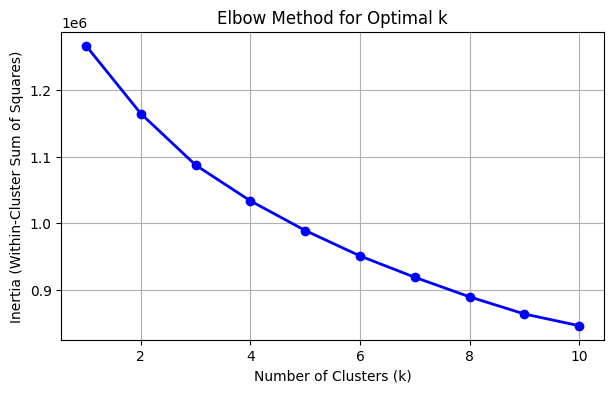

 Interpretation:
- The 'elbow' point on the graph (where inertia starts to flatten)
  indicates the optimal number of clusters.
- Commonly, this is around k = 3 or 4 for health datasets,
  but you should confirm visually from the plot. 


In [245]:

inertia = []
K = range(1, 11)

# Fit K-Means for different k values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Interpretation hint
print(""" Interpretation:
- The 'elbow' point on the graph (where inertia starts to flatten)
  indicates the optimal number of clusters.
- Commonly, this is around k = 3 or 4 for health datasets,
  but you should confirm visually from the plot. """)


6. APPLY K-MEANS CLUSTERING

In [ ]:

optimal_k = 4  # Manually selected based on the elbow method

#Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# score = silhouette_score(X_scaled, clusters)
# print("Silhouette Score:", score)

# Add cluster labels to the dataset
X_clustered = X_scaled_df.copy()
X_clustered['Cluster'] = clusters

# Display basic cluster distribution
print("Cluster counts:\n", X_clustered['Cluster'].value_counts())

# Calculate cluster centroids (in standardized scale)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled_df.columns)
print("\nCluster Centroids (Standardized Values):")
print(centroids)



KeyboardInterrupt: 

7. DIMENSIONALITY REDUCTION & VISUALIZATION ---

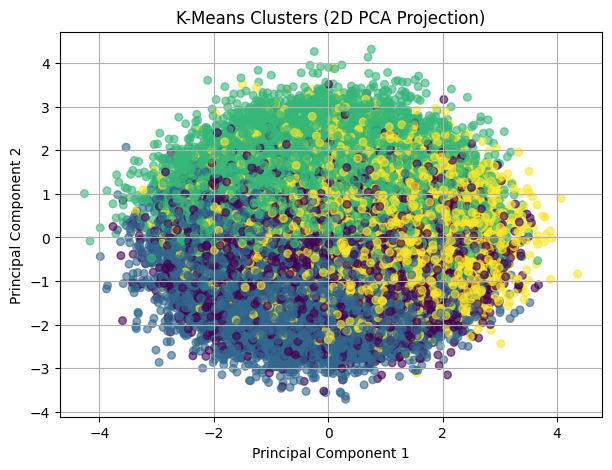

Explained variance by PCA components:
[0.12618595 0.12602066]


In [ ]:

# Separate features and cluster labels
features = [col for col in X_clustered.columns if col != 'Cluster']
X = X_clustered[features]
clusters = X_clustered['Cluster']

# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot clusters in 2D space
plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.6, s=30)
plt.title('K-Means Clusters (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.show()

# Explained variance ratio
print("Explained variance by PCA components:")
print(pca.explained_variance_ratio_)



8. CLUSTER INTERPRETATION

In [ ]:

# Add back original (unscaled) features for easier interpretation
clustered_data = original_df.copy()
clustered_data['Cluster'] = X_clustered['Cluster']

# Select only numeric columns for aggregation
numeric_cols = clustered_data.select_dtypes(include=['int64', 'float64']).columns

# Compute cluster-wise means for numeric data only
cluster_summary = clustered_data.groupby('Cluster')[numeric_cols].mean().round(2)

print("=== Cluster Summary by Health Indicators ===")
print(cluster_summary)

# Display number of samples per cluster
print("\nCluster sizes:")
print(clustered_data['Cluster'].value_counts())

# Interpretation guidance
print("""Interpretation Guide:
- Compare the mean values of each cluster.
- Higher blood pressure, LDL, and fasting blood sugar suggest higher cardiovascular risk.
- Lower cholesterol and triglycerides typically indicate healthier profiles.""")

# Example interpretation (you can refine this after examining your summary)
print("\nExample Interpretation:")
print("""
- Cluster 0: Likely lower-risk individuals — normal cholesterol and blood pressure levels.
- Cluster 1: Moderate risk — elevated LDL and systolic pressure.
- Cluster 2: High risk — older age, high triglycerides, and elevated fasting blood sugar.""")

=== Cluster Summary by Health Indicators ===
           age  hypertension  diabetes  cholesterol_level  obesity  \
Cluster                                                              
0        53.63           0.3       0.2             205.65     0.25   
1        53.81           0.3       0.2             210.52     0.25   
2        54.45           0.3       0.2             198.25     0.25   
3        56.28           0.3       0.2             183.70     0.25   

         waist_circumference  family_history  sleep_hours  \
Cluster                                                     
0                      93.22             0.3         6.49   
1                      93.21             0.3         6.47   
2                      93.35             0.3         6.48   
3                      93.30             0.3         6.48   

         blood_pressure_systolic  blood_pressure_diastolic  \
Cluster                                                      
0                         135.29           